In [3]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [4]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = Path('lending_data.csv')
lending_data_df = pd.read_csv(data)

# Review the DataFrame
display(lending_data_df.head())
display(lending_data_df.tail())

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [5]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data_df["loan_status"]

# Separate the X variable, the features
X = lending_data_df.drop(columns="loan_status")

In [6]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [7]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [8]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split # leaving import here as stated in comment; however, instructions stated this should be placed at the top of file

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(62028, 7)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [9]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression # leaving import here as stated in comment; however, instructions stated this should be placed at the top of file

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [10]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

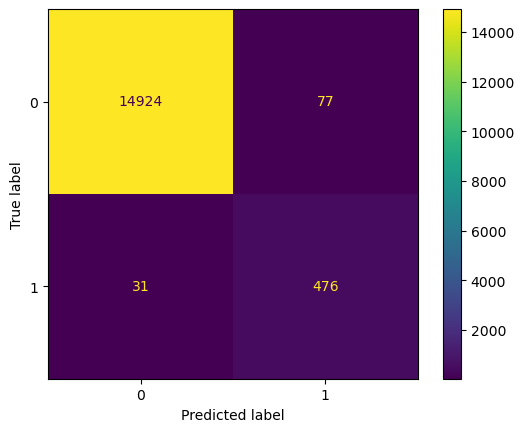

In [12]:
# Generate a confusion matrix for the model
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

plt.show()

In [13]:
# Print the classification report for the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.86      0.94      0.90       507

    accuracy                           0.99     15508
   macro avg       0.93      0.97      0.95     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model performs very well in predicting both 0 (healthy loan) and 1 (high-risk loan) labels. For 0 (healthy loans), the model achieves perfect precision and a very high recall of 0.99, meaning it correctly identifies nearly all healthy loans with minimal errors. For 1 (high-risk loans), the model has a precision of 0.86 and a recall of 0.94. While the recall for high-risk loans is strong (indicating that the model identifies most high-risk loans), there is room for improvement in precision, as 14% of the predicted high-risk loans were actually healthy. Overall, the model's F1-scores of 1.00 for healthy loans and 0.90 for high-risk loans demonstrate a strong balance between precision and recall. The overall accuracy of 99% reflects the model's effectiveness, though the imbalance in the dataset (with far more healthy loans than high-risk loans) may be contributing to the high accuracy.

---